In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<br><hr><br>

# 1) preprocessing and visualizing time-series data with Pandas

In [20]:
def read_data(input_file, index) : 
    input_data = np.loadtxt(input_file, delimiter=',')
    
    #문자열을 날짜 형식으로 변환하는 람다 함수
    to_date = lambda x, y : str(int(x)) + "-" + str(int(y))
    
    #시작 날짜 #input_data[:,0:2] == [[1900,1], [1900,2], [1900,3], [1900,4], [1900,5], ...]
    #현재 주어진 text 파일은 0열과 1열에 시작 날짜 정보를 포함하며, 종료 날짜는 제공하지 않는다.
    start = to_date(input_data[0,0], input_data[0,1])
    
    #종료 날짜는 시작 날짜 +1개월로 설정한다.
    if input_data[-1, 1] == 12 : 
        year = input_data[-1, 0] + 1
        month = 1
    else : 
        year = input_data[-1, 0]
        month = input_data[-1, 1] + 1
    end = to_date(year, month)
    
    
    #월별 빈도 정보 인덱스
    date_indices = pd.date_range(start, end, freq="M") #시작 날짜부터 끝 날짜까지 "M":월 간격으로 생성한다. cf) "D", "H", "5D" ...

    output = pd.Series(input_data[:, index], index=date_indices)
    
    return output

In [12]:
input_file = "data_2D.txt"
indices = [2,3]

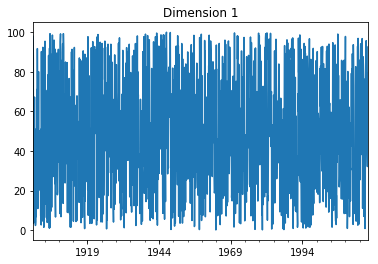

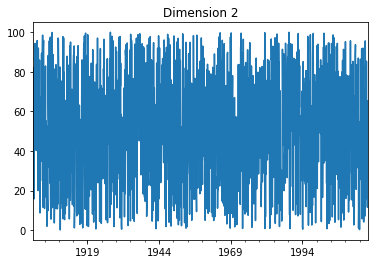

In [28]:
for index in indices : 
    timeseries = read_data(input_file, index)
    plt.figure()
    timeseries.plot()
    plt.title("Dimension " + str(index-1))
    plt.show()

#### pd.date_range 예시 참고

In [5]:
pd.date_range("2017-01", "2018-02", freq="2M")

DatetimeIndex(['2017-01-31', '2017-03-31', '2017-05-31', '2017-07-31',
               '2017-09-30', '2017-11-30', '2018-01-31'],
              dtype='datetime64[ns]', freq='2M')

<br><hr><br>

# 2) Indexing time-series data
- 일반 문자열과 다르게 pandas로 다루는 (위에서 pd.date_range()로 생성한) datetime 자료형은 더 자유롭게 인덱싱이 가능하다.

In [29]:
index = 2 
data = read_data("data_2D.txt", index)

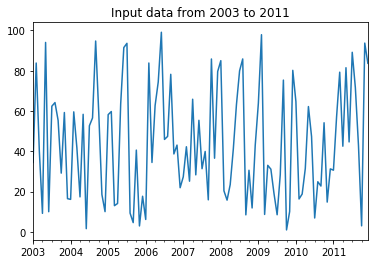

In [30]:
#연도 단위로 데이터 그리기
start = "2003"
end = "2011"
plt.figure()
data[start:end].plot()
plt.title("Input data from " + start + " to " + end)
plt.show()

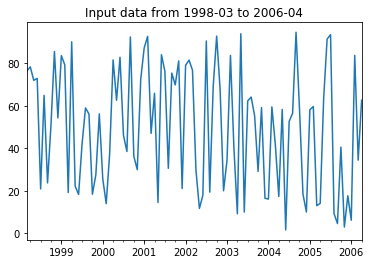

In [34]:
#월 단위로 데이터 그리기
start = "1998-03"
end = "2006-04"
plt.figure()
data[start:end].plot()
plt.title("Input data from " + start + " to " + end)
plt.show()

<br><hr><br>

# 2) Indexing time-series data
- 일반 문자열과 다르게 pandas로 다루는 (위에서 pd.date_range()로 생성한) datetime 자료형은 더 자유롭게 인덱싱이 가능하다.

In [35]:
input_file = "data_2D.txt"
x1 = read_data(input_file, 2)
x2 = read_data(input_file, 2)

In [36]:
data = pd.DataFrame({"dim1":x1, "dim2":x2})

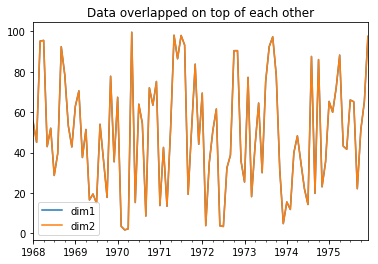

In [37]:
start = "1968"
end = "1975"
data[start:end].plot()
plt.title("Data overlapped on top of each other")
plt.show()

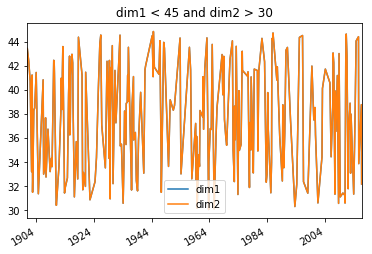

In [40]:
#조건을 이용해 필터링
#조건 1) : "dim1"이 특정 임계 값보다 작다.
#조건 2) : "dim2"이 특정 임계 값보다 크다.
data[(data["dim1"] < 45) & (data["dim2"] > 30)].plot()
plt.title("dim1 < 45 and dim2 > 30")
plt.show()

<br><hr><br>

# 3) Extracting statistical data from time-series data

In [41]:
input_file = "data_2D.txt"
x1 = read_data(input_file, 2)
x2 = read_data(input_file, 3)
data = pd.DataFrame({"dim1":x1, "dim2":x2})

In [42]:
#최대값, 최소값 추출
print("\nMaximum values for each dimension:")
print(data.max())
print("\nMinimum values for each dimension:")
print(data.min())


Maximum values for each dimension:
dim1    99.98
dim2    99.97
dtype: float64

Minimum values for each dimension:
dim1    0.18
dim2    0.16
dtype: float64


In [45]:
#행별 평균과 전체 평균 추출
print("\nRow-wise mean:") #data.mean()에서 mean()은 축을 parameter로 받는 듯
print(data.mean(1)[:12])
print("\nOverall mean:")
print(data.mean())


Row-wise mean:
1900-01-31    85.595
1900-02-28    75.310
1900-03-31    27.700
1900-04-30    44.675
1900-05-31    31.295
1900-06-30    44.160
1900-07-31    67.415
1900-08-31    56.160
1900-09-30    51.495
1900-10-31    61.260
1900-11-30    30.925
1900-12-31    30.785
Freq: M, dtype: float64

Overall mean:
dim1    49.030541
dim2    50.983291
dtype: float64


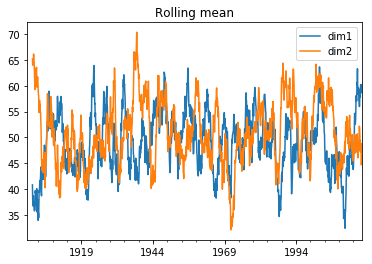

In [47]:
#창 크기 24의 이동 평균 그리기
data.rolling(center=False, window=24).mean().plot()
plt.title("Rolling mean") 
plt.show()

In [48]:
#상관계수 출력
print("\nCorrelation coefficients:\n", data.corr())


Correlation coefficients:
          dim1     dim2
dim1  1.00000  0.00627
dim2  0.00627  1.00000


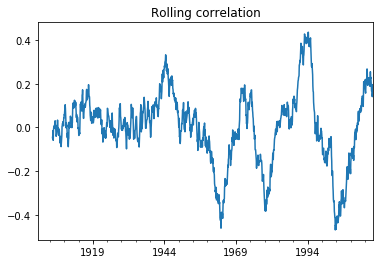

In [51]:
#창 크기 60의 이동 상관관계
plt.figure()
plt.title("Rolling correlation")
data["dim1"].rolling(window=60).corr(other=data["dim2"]).plot()
plt.show()